# Introduction

Question: How do NBA player efficiency ratings relate to salary?

Bringing in a revenue of approximately 8 billion US dollars during the 2017-2018 season, the National Basketball Association (NBA) is a great example of a successful professional league that has turned sports into an extraordinarily profitable business. The career of a NBA player requires not only intensive physical demands but also high stress and pressure, however with this comes high reward. The highest paid player in the 2017-18 season was Steph Curry, making $37.46million.

A team’s success on court is largely impacted by off-court strategy. This includes drafting talented individuals with large potential and negotiating contracts of high performing players. At the end of the day, a team is only as good as it’s players. From a logical point of view, it would make sense for a team to strategize its player salary budget in order to pay each player for the exact value they provide to the team. However, quantifying a player’s value to a team is a difficult task. For example, an individual’s experience and leadership are difficult variables to quantify. Furthermore, the building of a successful team is much more complicated than who the best players are and logical budgeting. Player’s contracts, injuries and competition for top players from multiple teams are examples of variables that can play a substantial role in what players are available and what team they sign with. Salary is not only an important component of a players contract, but it has also been found to be a motivator for success. Player performance has been found to significantly improve during contract years (White and Sheldon 2013). 

This study aims to better understand how much salary actually reflects a player’s on-court efficiency. Player efficiency ratings (PER), developed by John Hollinger, evaluate a players overall contributions to their team (Hollinger 2007). The rating calculated the per-minute productivity, incorporating field goals, free throws, 3-pointers, assists, rebounds, blocks and steals as positive accomplishments. Missed shots, turnovers and personal fouls are all attributed as negative  attributes and lower a rating. The rating is pace-adjusted, meaning that the pace of a team does not impact the player’s rating. Although the statistic has been critiqued for over emphasizing offensive performance and neglecting defensive players, it does quantify player performance in a standardized way allowing players to be compared. This study will focus investigating the relationship between PER and salary, using player statistics from the 2017-2018 year. 

# Methods and Results

NBA player statistics and salary data for the 2017-2018 season was used to investigate the relationship between player performance and compensation. This data set obtained from Kraggle open data and was created by the user meicher. https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary 

From this data set, I will be focusing on three variables that have been found to significantly impact a team's season performance: assist percent, steal percent and block percent (Reference). In addition, I will be examining overall player efficiency ratings. These variables will be used as a proxy for player performance. 

In [19]:
library(dplyr)

#NBA statistics for 2017-2018 season
nba_stats = read.csv("NBA_DATA_2017.csv")

#Select for columns of interest
stat = select(nba_stats, Player, Salary, PER)

# Exploring and Cleaning the Data

To better understand the data set, I investigated the number of unique rows and unique player names. I found that there was 648 unique rows in the data. Interestingly, there were only 528 unique player names. This is because some players (ex. Willie Reed) played for multiple teams during the season. Because this analysis focuses on the relationship between salary and player statistics, a player with the same salary but different statistics would still be valuable information. Because of this I decided to use a data set with unique entires, but kept the duplicated players who played for multiple teams. 

Table 1 . Unique data entries for player, salary and PER, in the NBA data set  

In [20]:
#Investigating unique rows and unique player names
unique(stat)
length(unique(stat$Player))


,Player,Salary,PER
,<fct>,<int>,<dbl>
1,Anthony Brown,0,41.9
2,Vince Hunter,50000,35.8
3,Nigel Hayes,92160,34.9
4,David Stockton,148318,33.9
5,Shabazz Muhammad,1577230,31.0
6,Boban Marjanovic,7000000,30.6
7,James Harden,28299399,29.8
8,Anthony Davis,23775506,28.9
9,LeBron James,33285709,28.6


[1] 528

The players making $0 were filtered and searched on Google to understand why they existed. I found that these players all played for the G-league, and therefore did not recieve a NBA salary. Because of this we removed these players from the study and will focus on the 601 entries of player stats with salaries. 

Table 2. Filtered data for players making $0 during the 2017-2018 season.

In [23]:
#Make each column numeric
stats$Salary = as.numeric(stat$Salary)
stats$PER = as.numeric(stat$PER)

#Filter for players making $0
filter(stat, Salary=="0")

#Create a new data frame with players making >$0
stat_salary = filter(stat, Salary>0)

Player,Salary,PER
<fct>,<int>,<dbl>
Anthony Brown,0,41.9
Monte Morris,0,27.1
Jack Cooley,0,19.7
Adreian Payne,0,18.8
Daniel Hamilton,0,18.2
Mangok Mathiang,0,18.0
Johnathan Motley,0,17.2
JaKarr Sampson,0,13.9
Luke Kornet,0,13.6


# Visualizing the Data 

Scatterplots, boxplots and histograms were produced to investigate the relationships, outliers and distribution of the data.


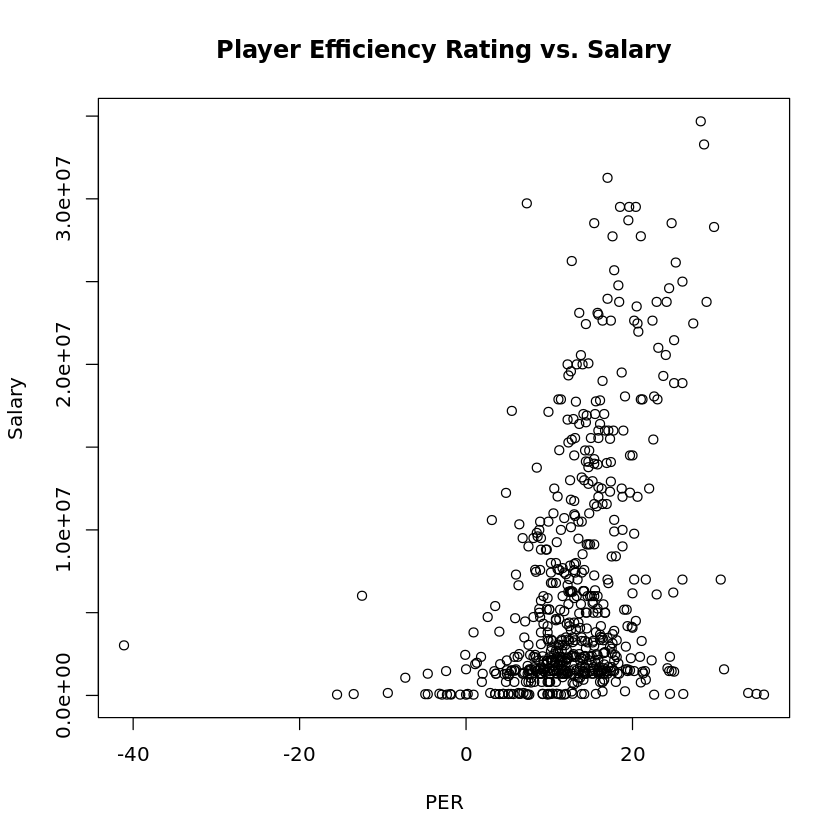

In [24]:
plot(x=stat_salary$PER, y=stat_salary$Salary, main="Player Efficiency Rating vs. Salary", xlab = "PER", ylab = "Salary")


Figure 1. Relationship between player salary and player efficiency ratings during the NBA 2017-18 season. 

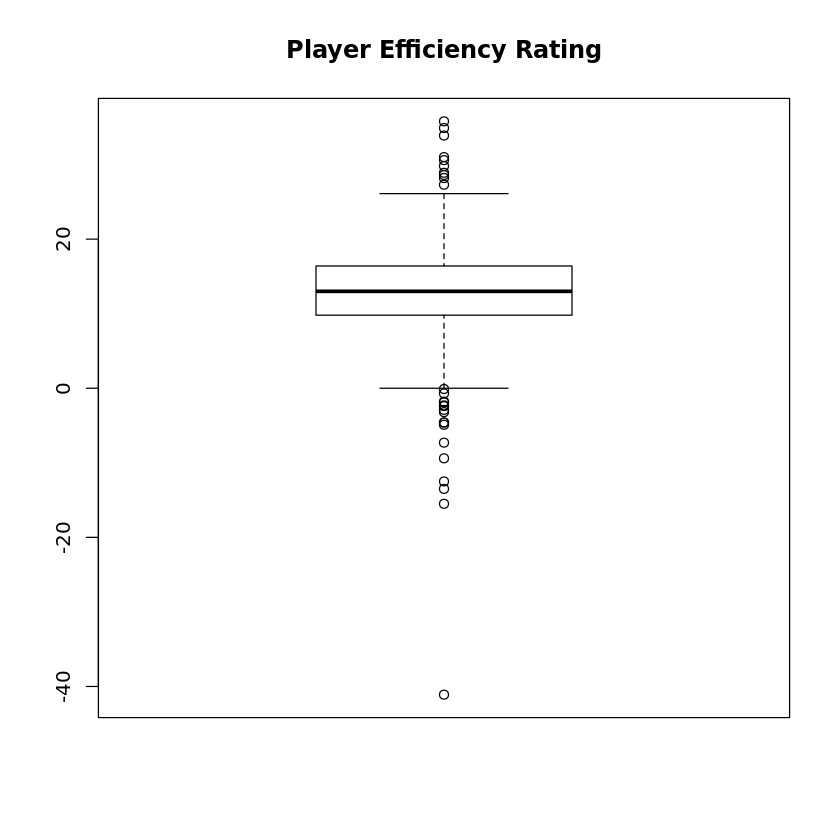

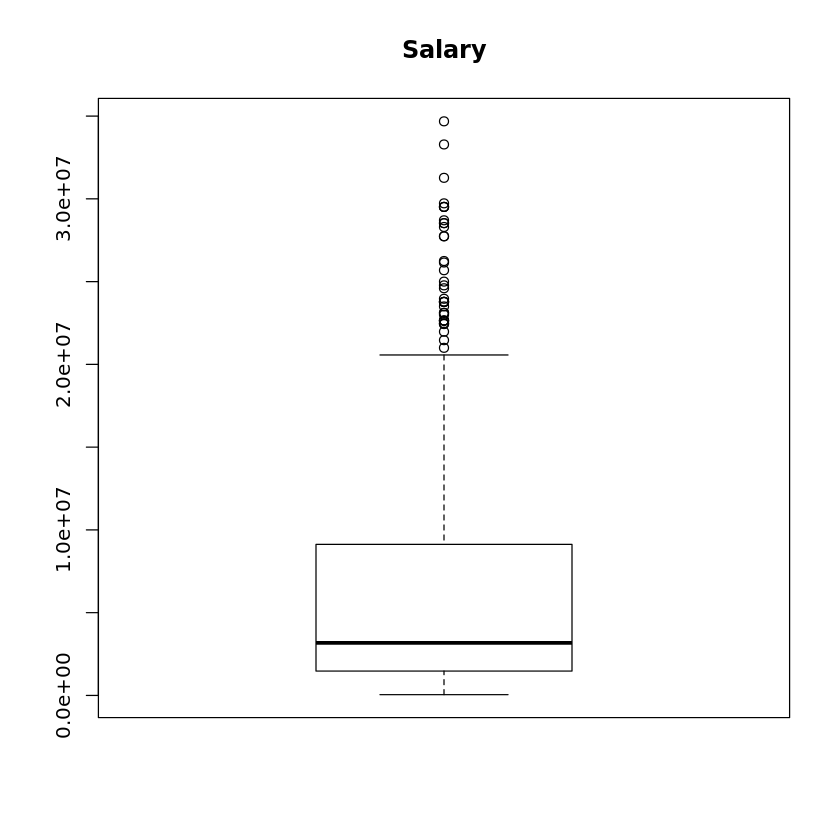

In [25]:
boxplot(stat_salary$PER, main="Player Efficiency Rating")
boxplot(stat_salary$Salary, main="Salary")


Figure 2. Distribution of outliers in the NBA salary and PER data.

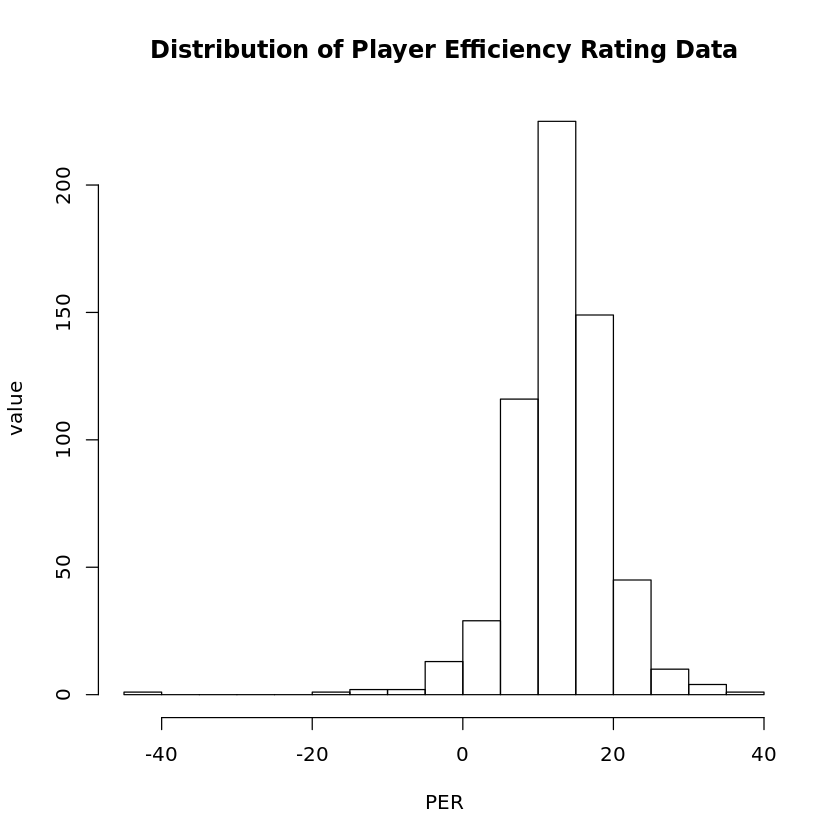

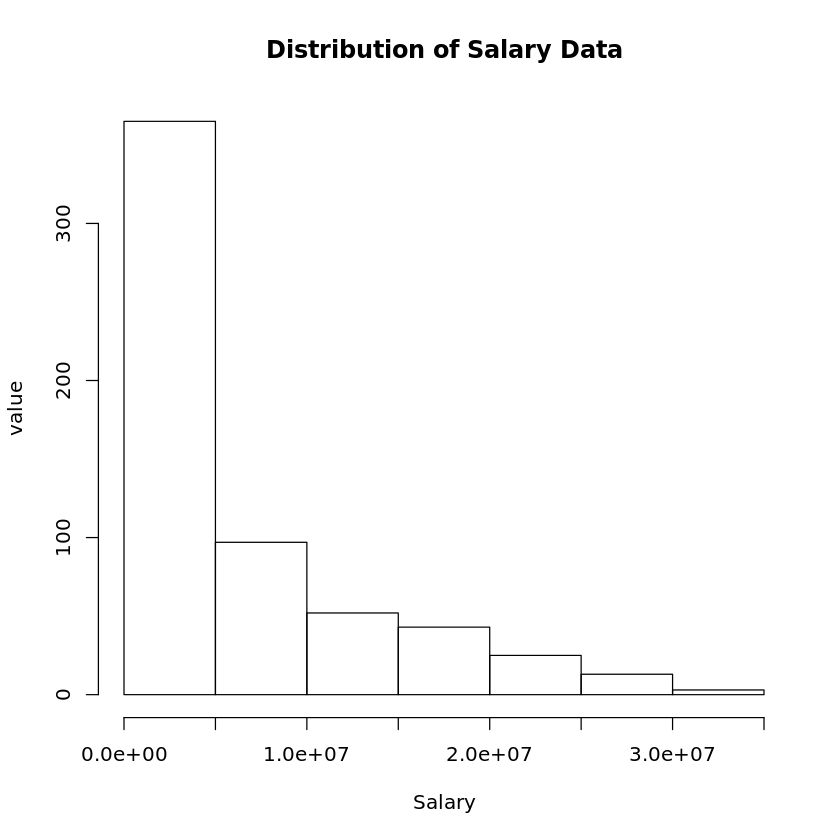

In [29]:
hist(stat_salary$PER, main = "Distribution of Player Efficiency Rating Data", xlab = "PER", ylab = "value")

hist(stat_salary$Salary, main = "Distribution of Salary Data", xlab = "Salary", ylab = 'value')


Overall, we can see in the scatterplot that there is a steep positive exponential relationship between salary and PER. The salary data follows a fairly normal distribution with many outliers above the upper limit. The boxplot and histogram show how the data is clustered with a fairly small range. Additionally, the boxplot highlights the large number of outliers, and in particular one that is expceptionally far from the lower limit.

To further investigate this, the extreme outlier was queried from the data set and found to be Mindaugas Kuzminskas.



Table 3. Query for extreme outlier in the PER data.

In [28]:
filter(stat_salary, PER<(-20))

Player,Salary,PER
<fct>,<int>,<dbl>
Mindaugas Kuzminskas,3025035,-41.1


# Discussion

An initial exploration of the 2017-2018 season data revealed some interesting characteristics about the salary and PER data. Overall, the salary data had a normal distribution that was slightly skewed, with many players making lower salaries and few making very large salaries. Furthermore, there were a lot of outliers in the salary data, all falling above the upper limit. This is likely because the top performing players are in high demand and are paid competitive salaries by the teams signing them. Interestingly, the lack of lower limit outliers indicates that the majority of players are receiving a fairly similar salary, with none earning substantially lower salaries than the rest.

The PER data was fairly normally distributed.  There were many outliers outside of the upper and lower limits, with two especially notable values that were substantially further away from the rest of the data. These two outliers were Naz Mitrou-Long with a PER of 133.8 and Mindaugas Kuzminskas with a PER of -41.1. After further investigating, it was found that Mitrou-Long’s actual PER was 15.1 during the 2017-2018 season (Basketball Reference 2019). This indicates that there are some fairly large errors in the dataset. This dataset was from Kaggle, a website that allows users to publish open data sets. Because of this, it is not surprising that there may be errors in the data (Hollinger 2007). 

This data set did not meet both the Pearson’s correlation or the linear regression assumptions as there were many outliers for both variables. Because of this the relationship between salary and PER was not quantified. Overall, a scatterplot shows that these two variables are positively correlated and seem to have an exponential relationship. As mentioned above, this relationship is not necessarily accurate as there were errors in the data. Unfortunately, this means that this study would need to be repeated with accurate data in order to make any confident conclusions.  

This study was an exploration into the PER and salary data for the 2017-2018 season and demonstrated a positive relationship between the two variables. It would be interesting to further this study by comparing different box office statistics and understand how each relates to salary. In particular, assists, rebounds, blocks, free throws and personal fouls were found to be significantly associated with season-long success (Summers 2013). Understanding how these variables relate to salary could explain how players are compensated for valuable skills.  Additionally, future studies could examine how factors outside of skill level impact salary. For example, how does age, race or public opinion of a player impact their salary? In conclusion, this study was a valuable exploration into one estimate of player efficiency, however salary is likely impacted by many variables to varying degrees and there are many opportunities to further investigate this.   

# References

Hollinger J. What is PER? ESPN. 2007 Apr 26 [accessed 2019 Nov 19]. https://www.espn.com/nba/columns/story?columnist=hollinger_john&id=2850240

Naz Mitrou-Long NBA Stats. Basketball Reference. [accessed 2019 Nov 19]. https://www.basketball-reference.com/gleague/players/m/mitrona01d.html

Summers MR. 2013. How to Win in the NBA Playoffs: A Statistical Analysis. American Journal of Management. Vol 13 Issue 3: 11-24

White MH and Sheldon KM. 2013. The contract year syndrome in the NBA and MLB: A classic undermining pattern. Volume 38, Issue 2: 162-205
